In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append('./')

In [2]:
data = pd.read_csv('data/AMZN.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [3]:
data['Volume']

0       72156000
1       14700000
2        6106800
3        5467200
4       18853200
          ...   
5660     1946000
5661     2037600
5662     2989500
5663     2264800
5664     3927600
Name: Volume, Length: 5665, dtype: int64

<AxesSubplot:xlabel='Date'>

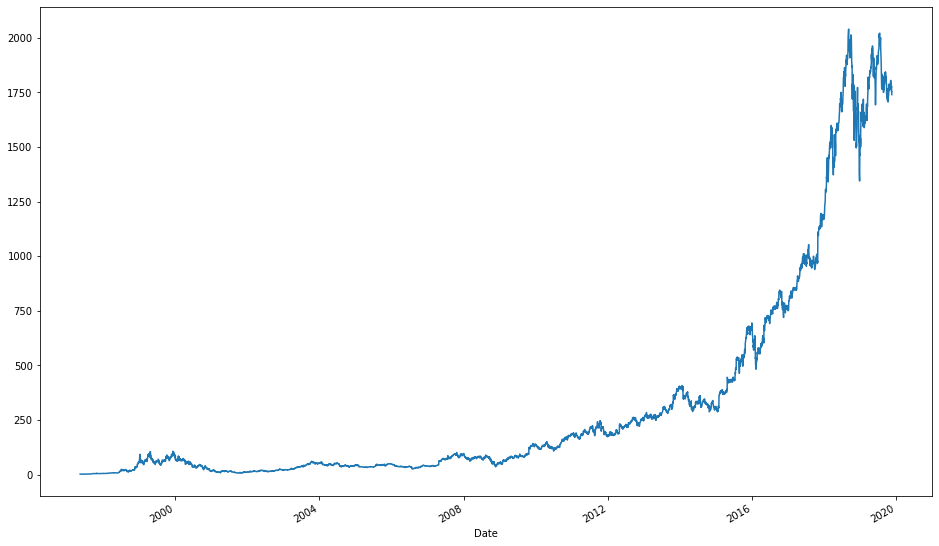

In [4]:
data.set_index('Date')['Close'].plot(figsize=(16, 10))

<AxesSubplot:xlabel='Date'>

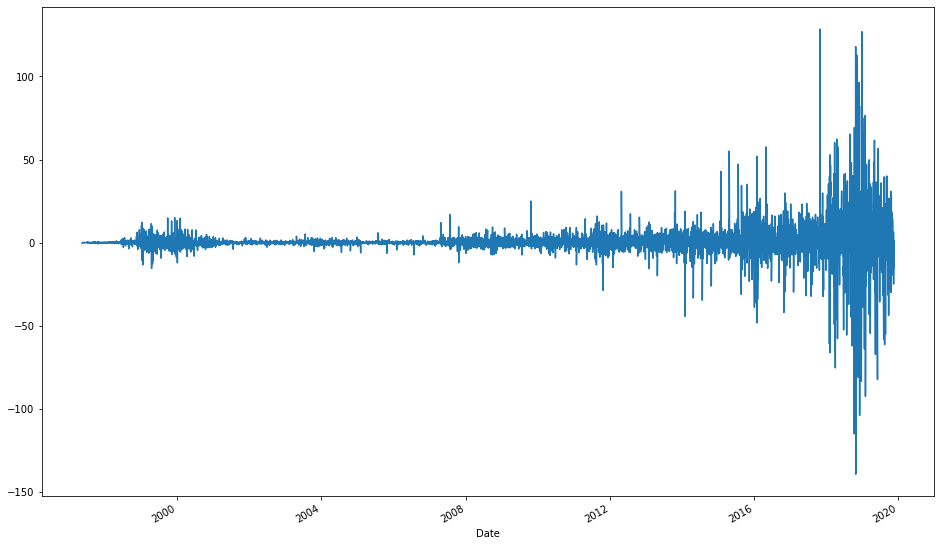

In [5]:
data.set_index('Date')['Close'].diff().plot(figsize=(16, 10))

# Task 1

<AxesSubplot:xlabel='Date'>

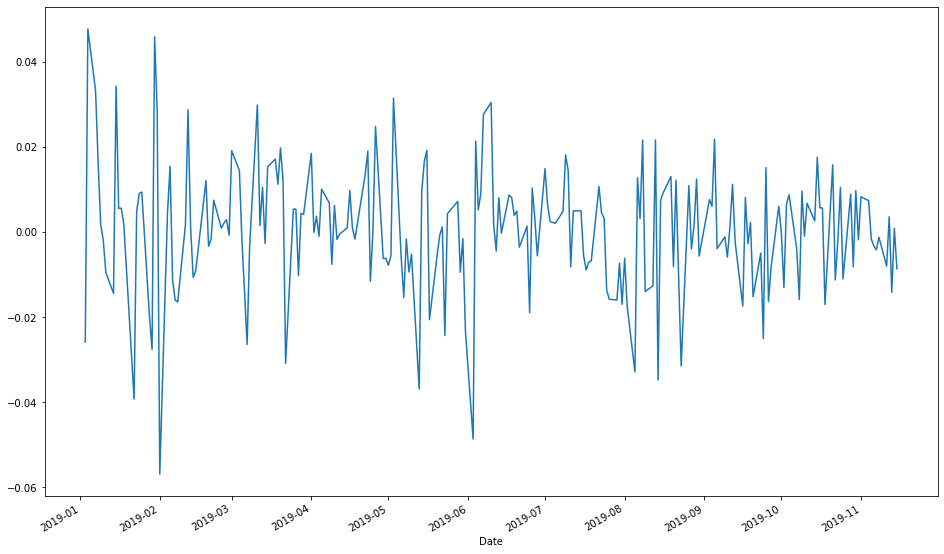

In [6]:
a = data[data['Date'] > '2018-12-31'].set_index('Date')
(a['Close'].diff()/a['Close']).plot(figsize=(16, 10))

In [7]:
from matplotlib import pyplot as plt

In [8]:
from sklearn.metrics import log_loss, f1_score, roc_auc_score

log_reg
log_loss: 0.5721309301519178
roc_auc: 0.7597765363128491


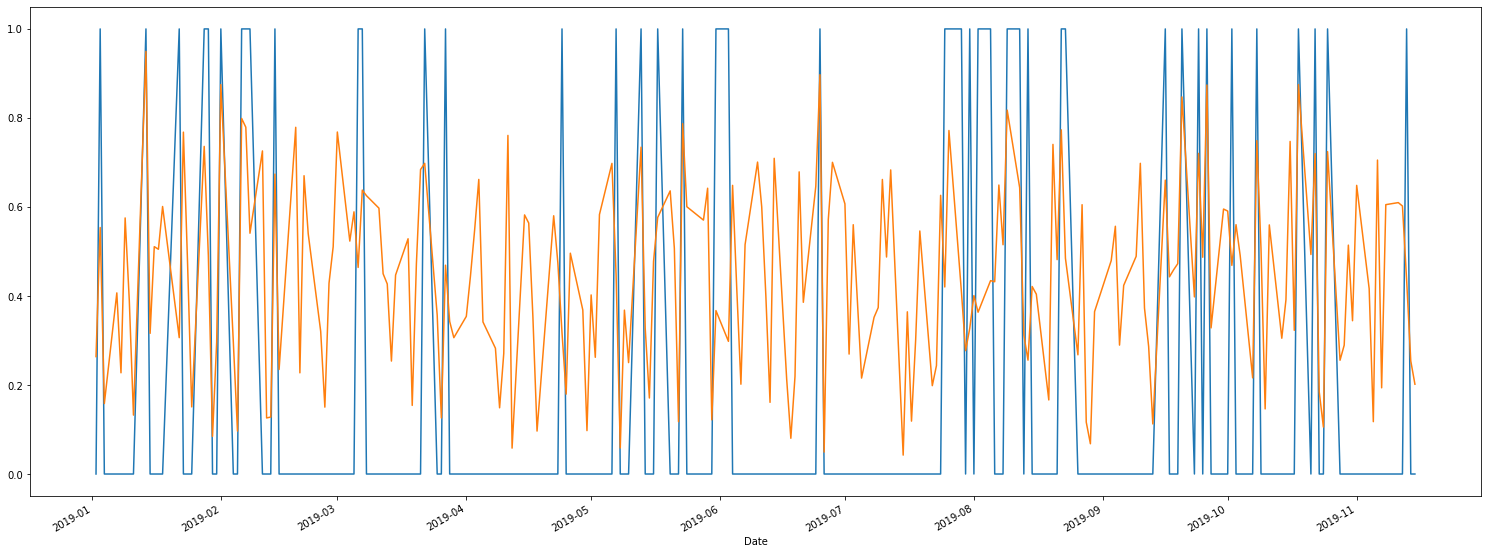

elastic_net
log_loss: 0.476746323431988
roc_auc: 0.8676107574379628


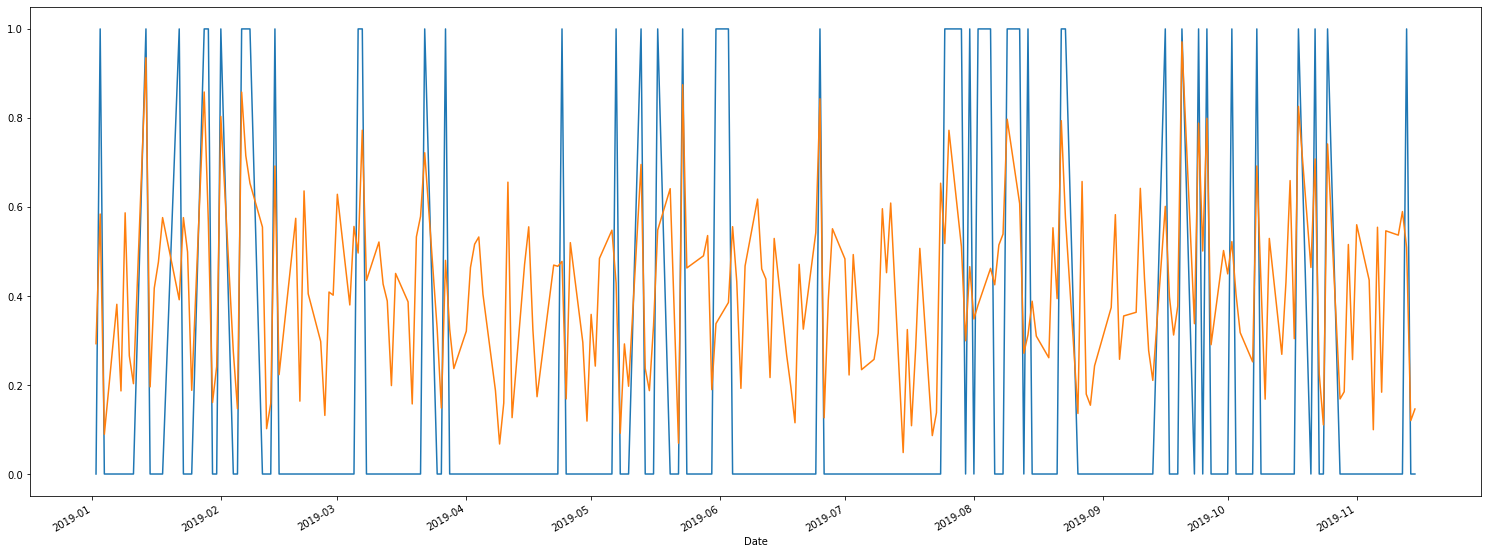

lgbm
log_loss: 0.4351641386820991
roc_auc: 0.931791607119657


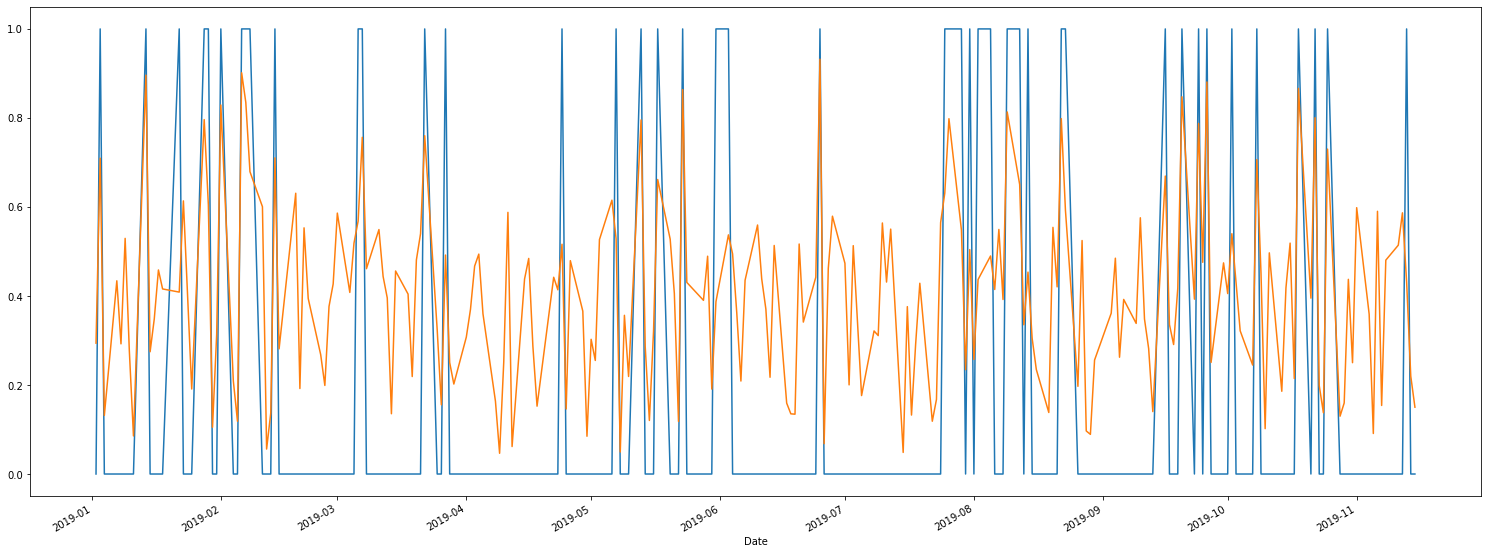

lstm
log_loss: 0.3828841244046626
roc_auc: 0.9749252955697025


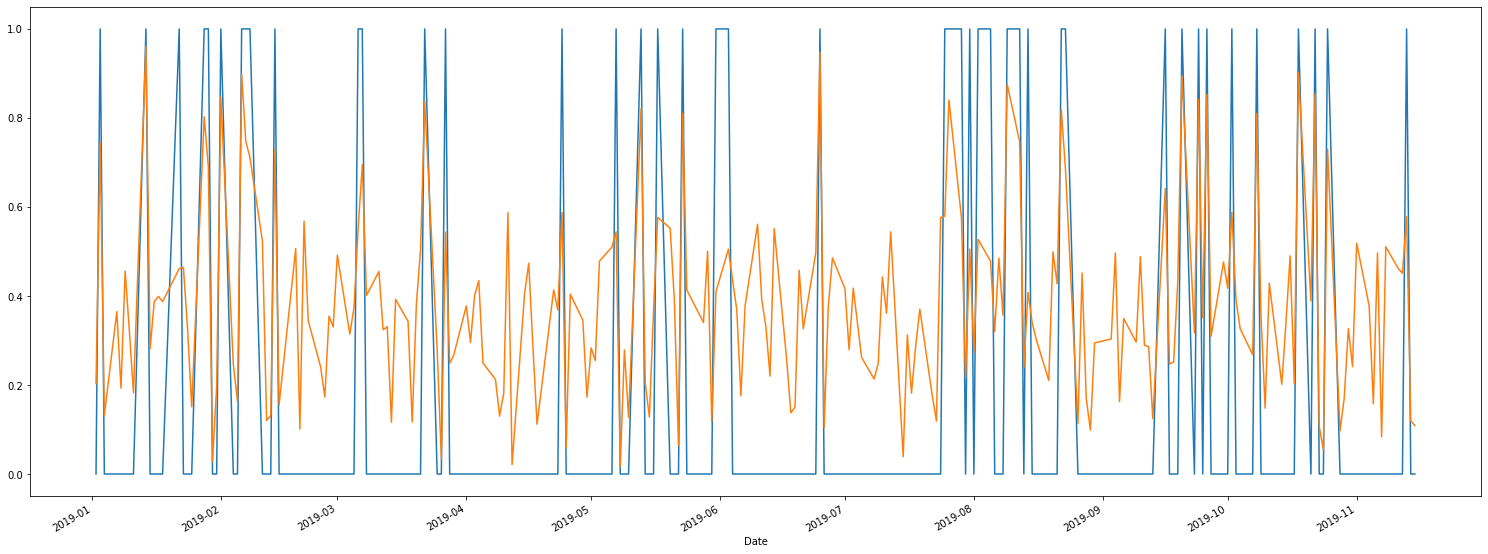

transformer
log_loss: 0.38268162198818884
roc_auc: 0.9715473561127712


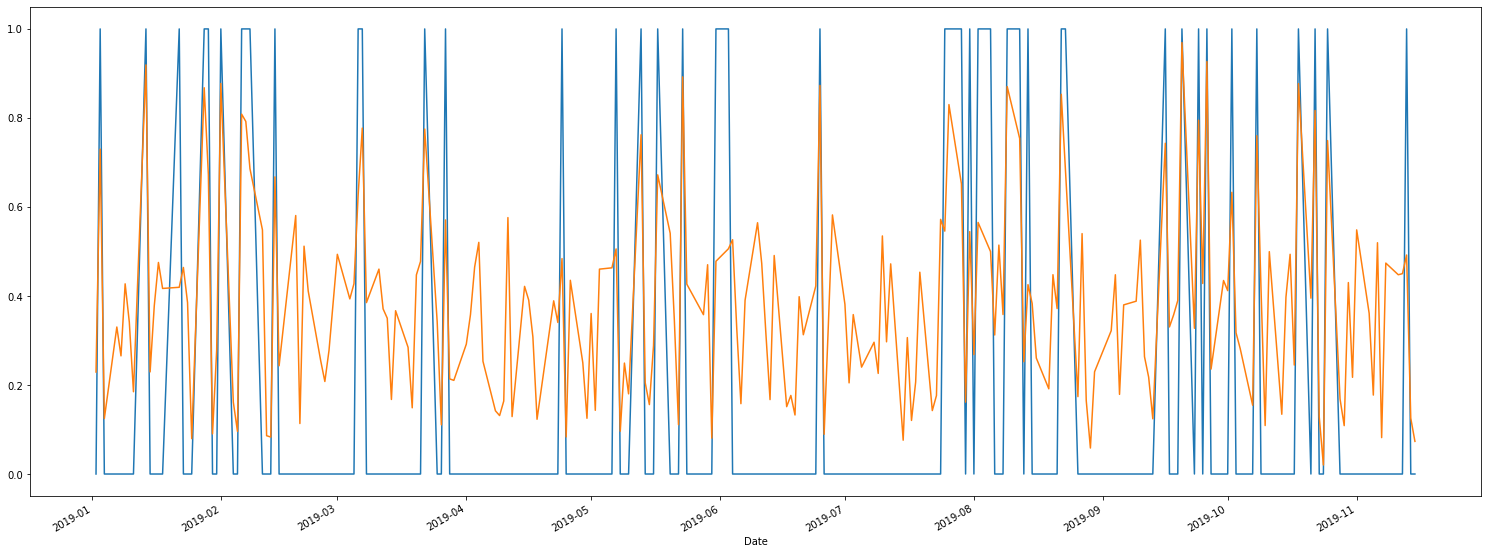

In [9]:
from task1 import get_model_fit_predict
from utils.preprocessing import create_features_and_split

models = get_model_fit_predict
graps = {}
true_target = ((data['Close'].diff()/data['Close']) < -0.01).astype(int).iloc[:-1]
input_data = create_features_and_split(
    data.iloc[:-1], 
    true_target,
    split_date='2018-12-31'
)
for model_name, model_fit_predict in models.items():
    model_predict = model_fit_predict(input_data)
    graps[model_name] = model_predict
    
for k,v in graps.items():
    print(k)
    print(f'log_loss: {log_loss(true_target, v)}')
    print(f'roc_auc: {roc_auc_score(true_target, v)}')
    true_target.plot(figsize=(26, 10))
    v.plot()
    plt.show()

In [10]:
pd.DataFrame(np.array([v for k, v in graps.items()]).T, columns=graps.keys()).corr()

,log_reg,elastic_net,lgbm,lstm,transformer
log_reg,1.000000,0.932852,0.915302,0.866836,0.869986
elastic_net,0.932852,1.000000,0.958905,0.935552,0.940170
lgbm,0.915302,0.958905,1.000000,0.959309,0.963324
lstm,0.866836,0.935552,0.959309,1.000000,0.968980
transformer,0.869986,0.940170,0.963324,0.968980,1.000000


# Task 2

<AxesSubplot:xlabel='Date'>

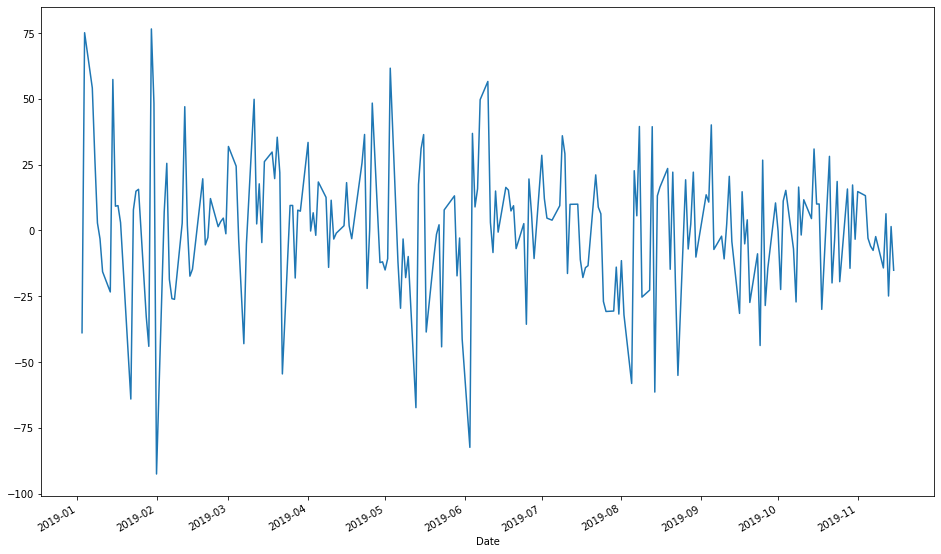

In [11]:
a = data[data['Date'] > '2018-12-31'].set_index('Date')
a['Close'].diff().plot(figsize=(16, 10))

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_reg
23.305668722656314
848.5186903775057


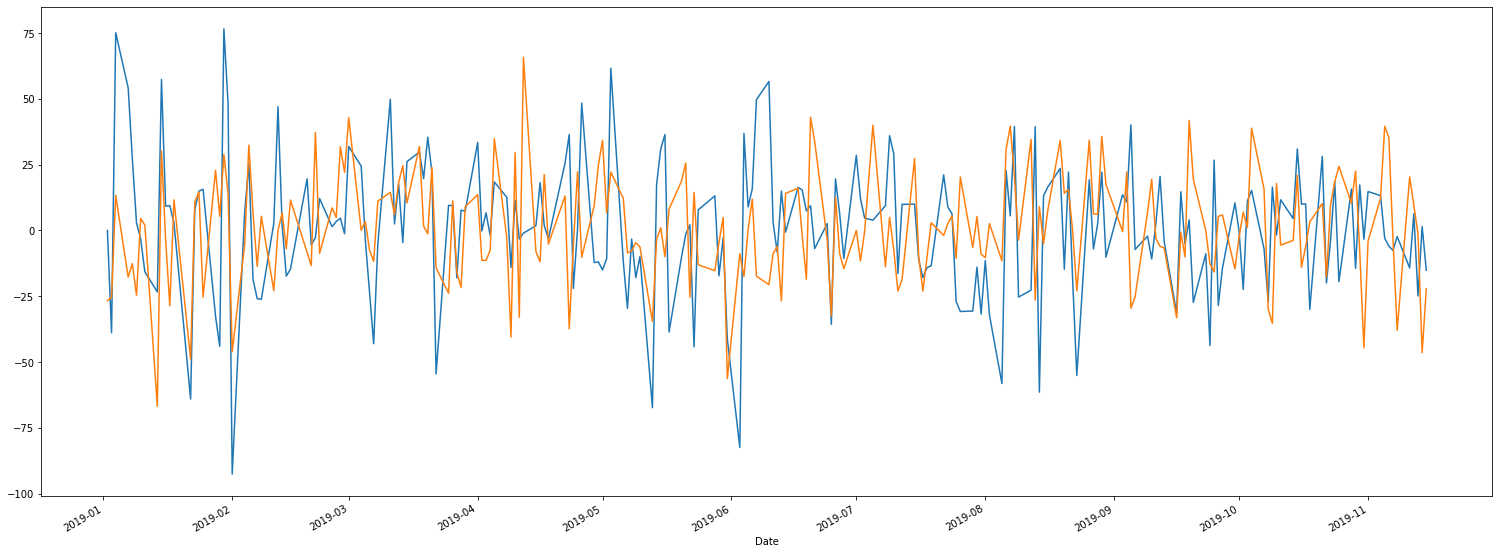

elastic_net
20.800492695340484
660.2901267123908


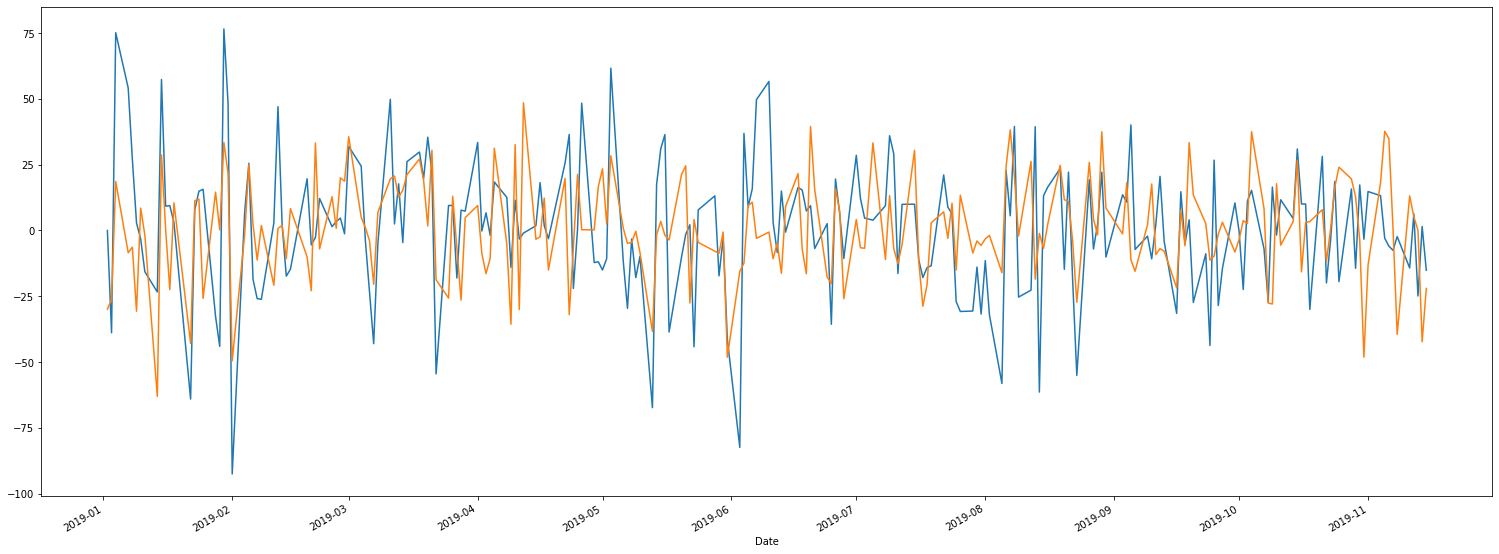

lgbm
19.38365326891589
570.2919274698035


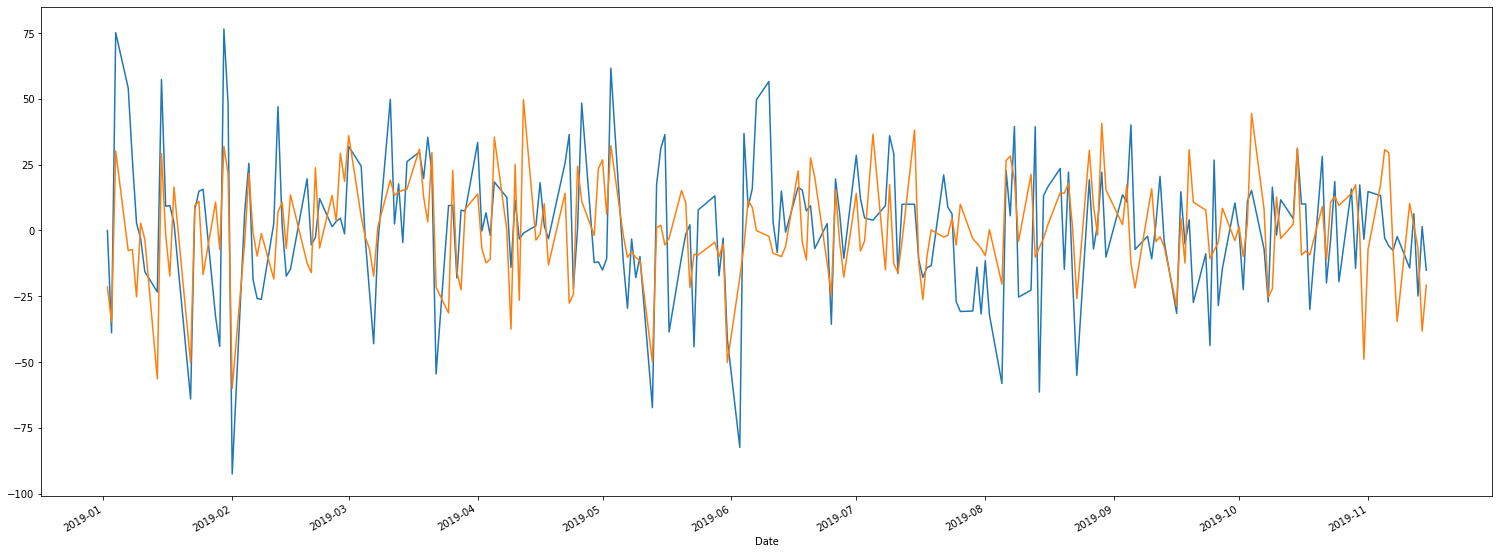

lstm
17.81743910082203
487.34012092342994


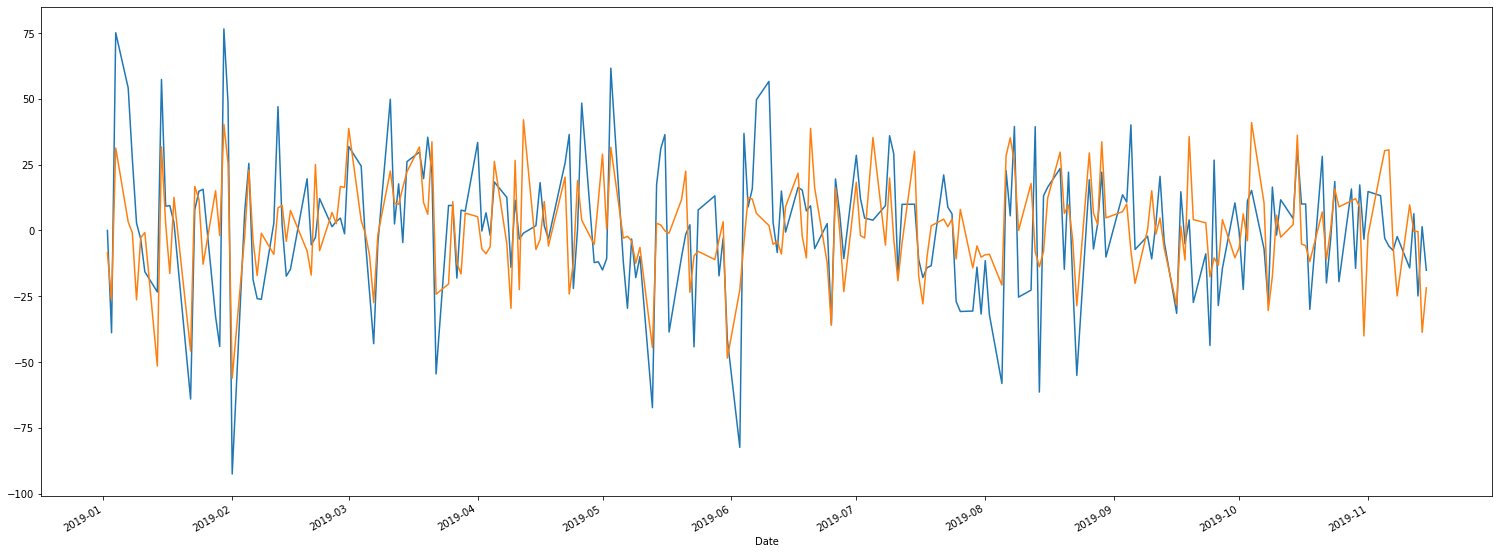

transformer
17.58223486691085
471.41152794632876


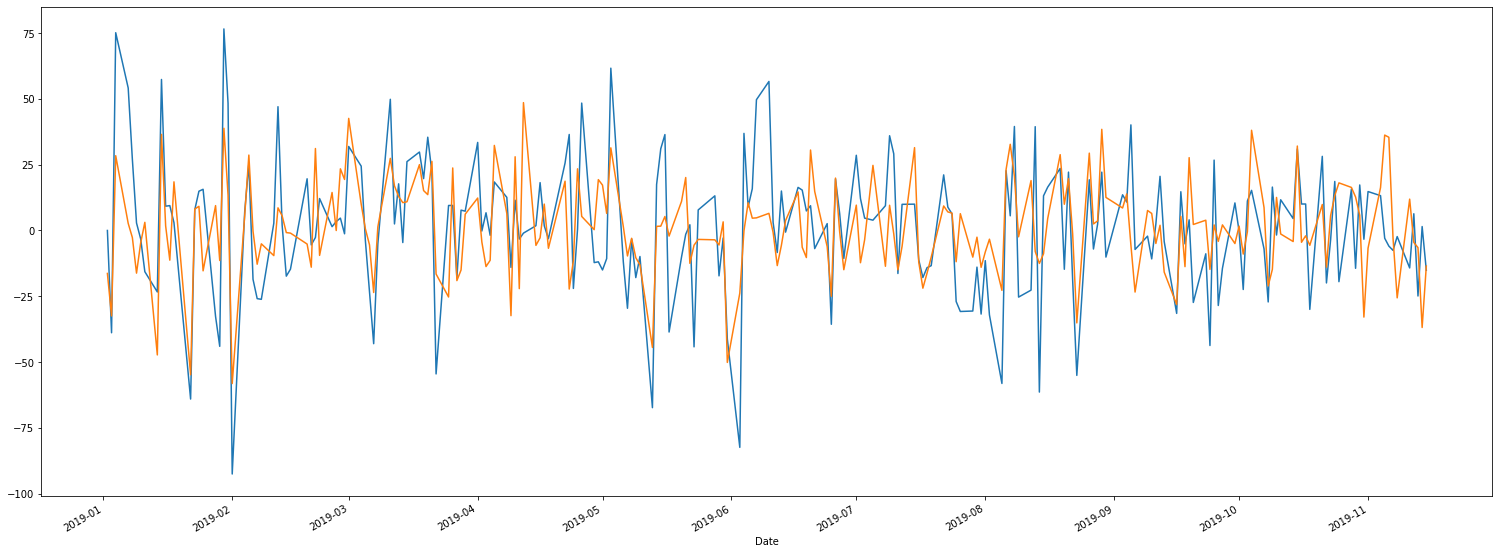

In [13]:
from task2 import get_model_fit_predict
from utils.preprocessing import create_features_and_split

models = get_model_fit_predict
graps = {}
true_target = data['Close'].diff().iloc[:-1]
input_data = create_features_and_split(
    data.iloc[:-1], 
    true_target,
    split_date='2018-12-31'
)
for model_name, model_fit_predict in models.items():
    model_predict = model_fit_predict(input_data)
    graps[model_name] = model_predict
    

for k,v in graps.items():
    print(k)
    print(mean_absolute_error(true_target, v))
    print(mean_squared_error(true_target, v))
    true_target.plot(figsize=(26, 10))
    v.plot()
    plt.show()

In [14]:
pd.DataFrame(np.array([v for k, v in graps.items()]).T, columns=graps.keys()).corr()

,lin_reg,elastic_net,lgbm,lstm,transformer
lin_reg,1.000000,0.948244,0.923180,0.900023,0.893234
elastic_net,0.948244,1.000000,0.956554,0.945218,0.936433
lgbm,0.923180,0.956554,1.000000,0.955909,0.959068
lstm,0.900023,0.945218,0.955909,1.000000,0.955384
transformer,0.893234,0.936433,0.959068,0.955384,1.000000


# Task 3

In [15]:
a = data[data['Date'] > '2018-12-31'].set_index('Date')
#a['Close'].diff().plot(figsize=(16, 10))

<AxesSubplot:xlabel='Date'>

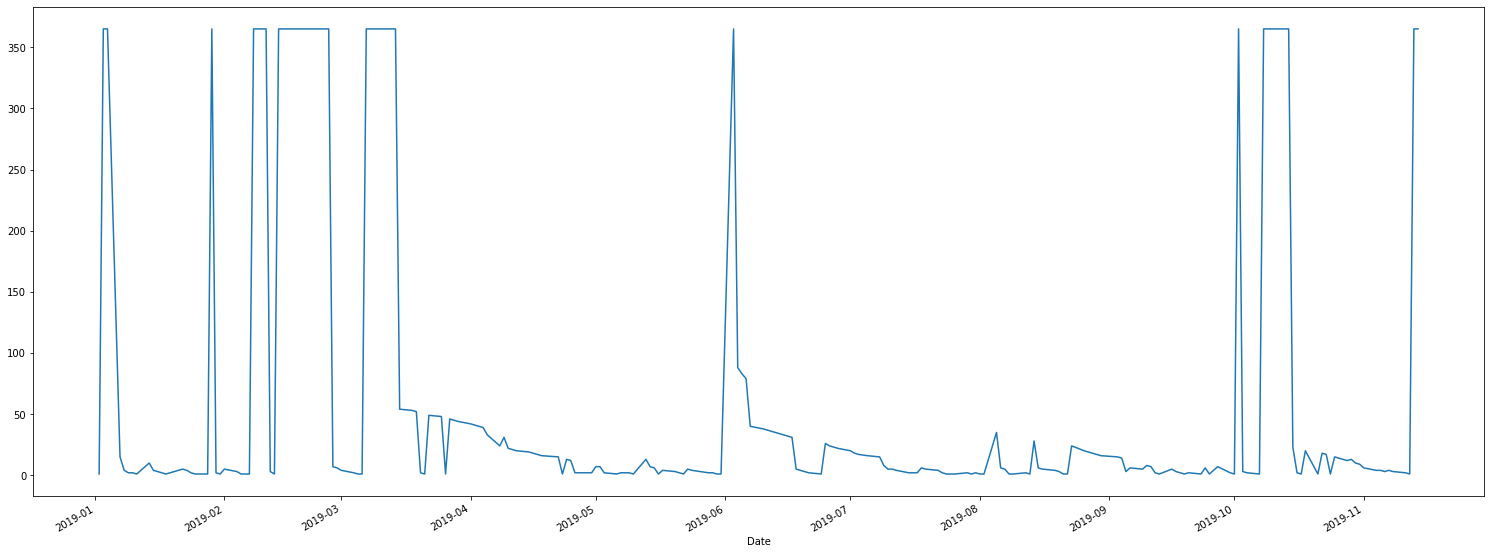

In [16]:
taregt = {i:365 for i in range(a['Close'].shape[0]-1)}

for i,el in enumerate(a['Close'].iloc[:-1]):
    for j, next_el in enumerate(a['Close'][i:]):
        if next_el/el < 0.99:
            taregt[i] = j
            break


true_target = pd.Series(list(taregt.values()), index= a.index[:-1])
true_target.plot(figsize=(26, 10))

lin_reg
68.72100593893687
10328.586333566116


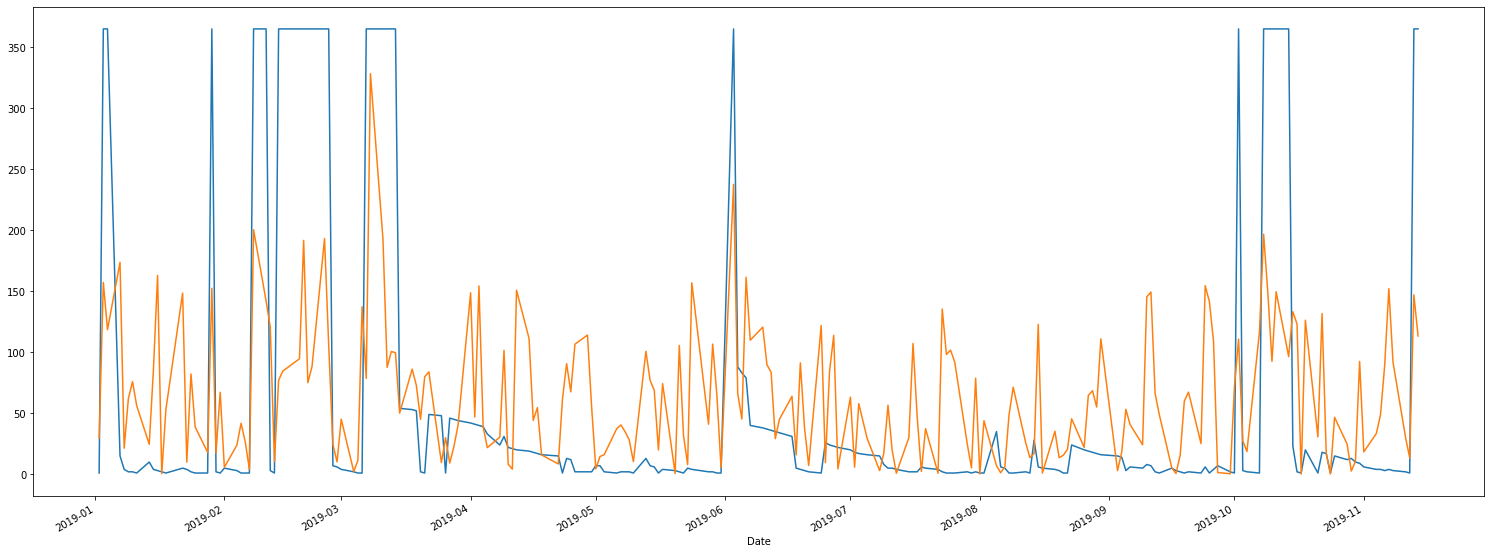

elastic_net
60.969973910570786
8056.5274465648245


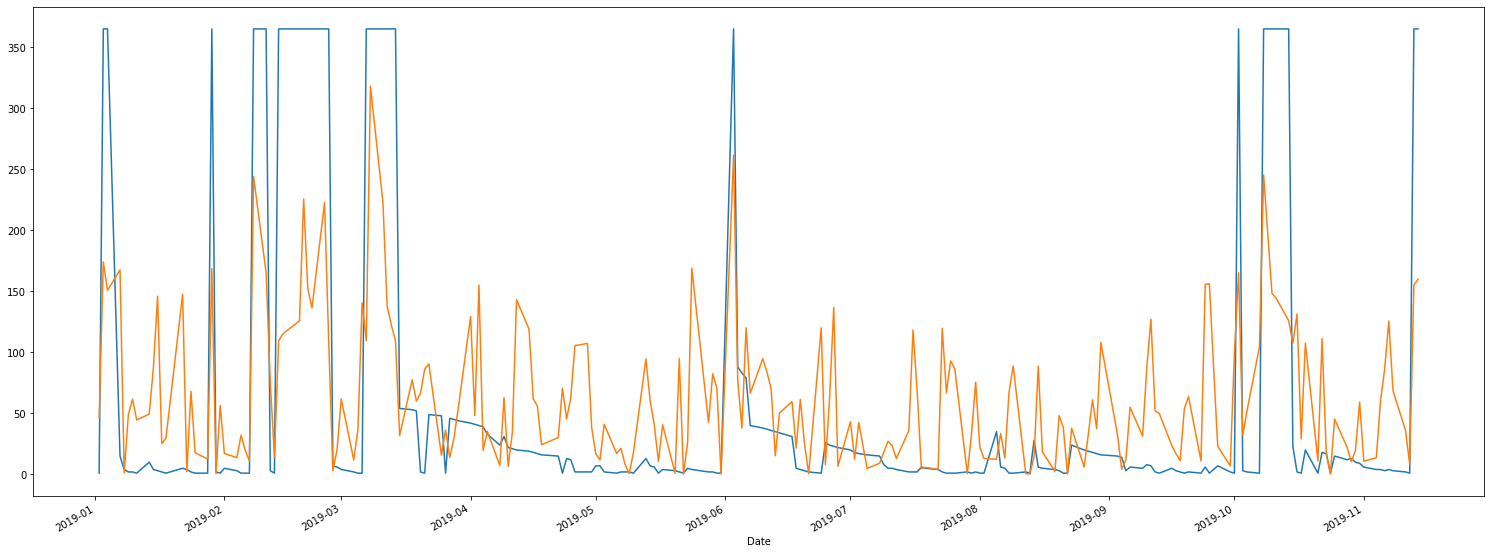

lgbm
55.777191449935884
6807.061138489569


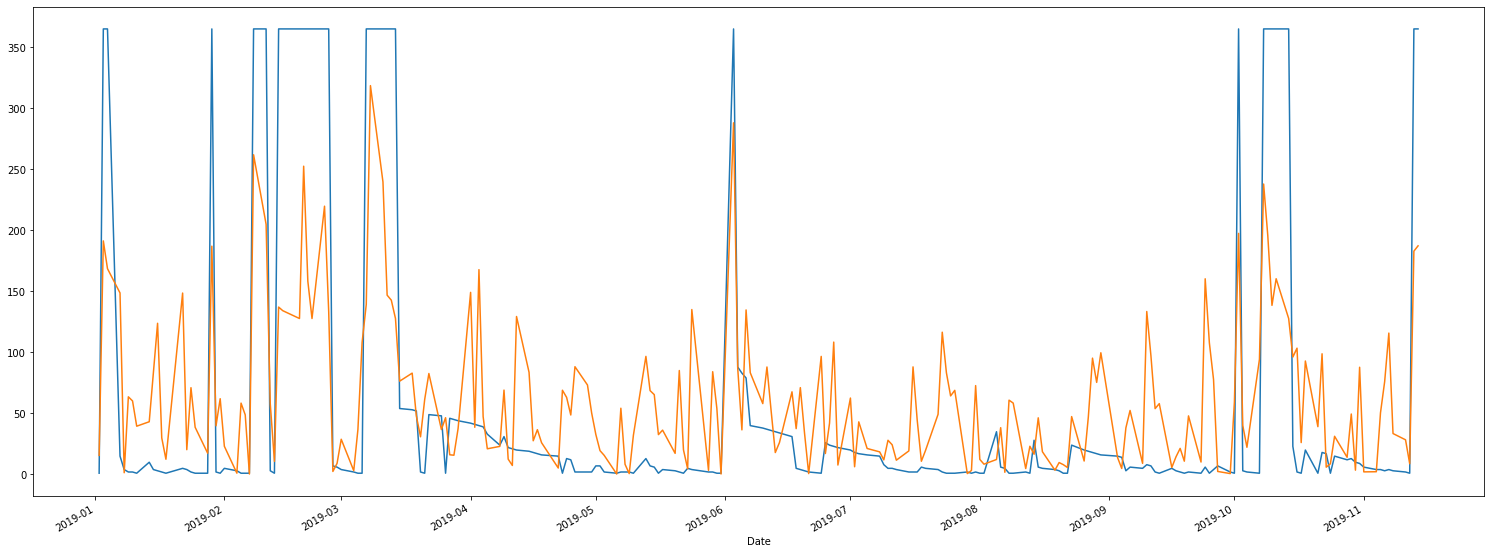

lstm
51.91790235625175
5923.311142921985


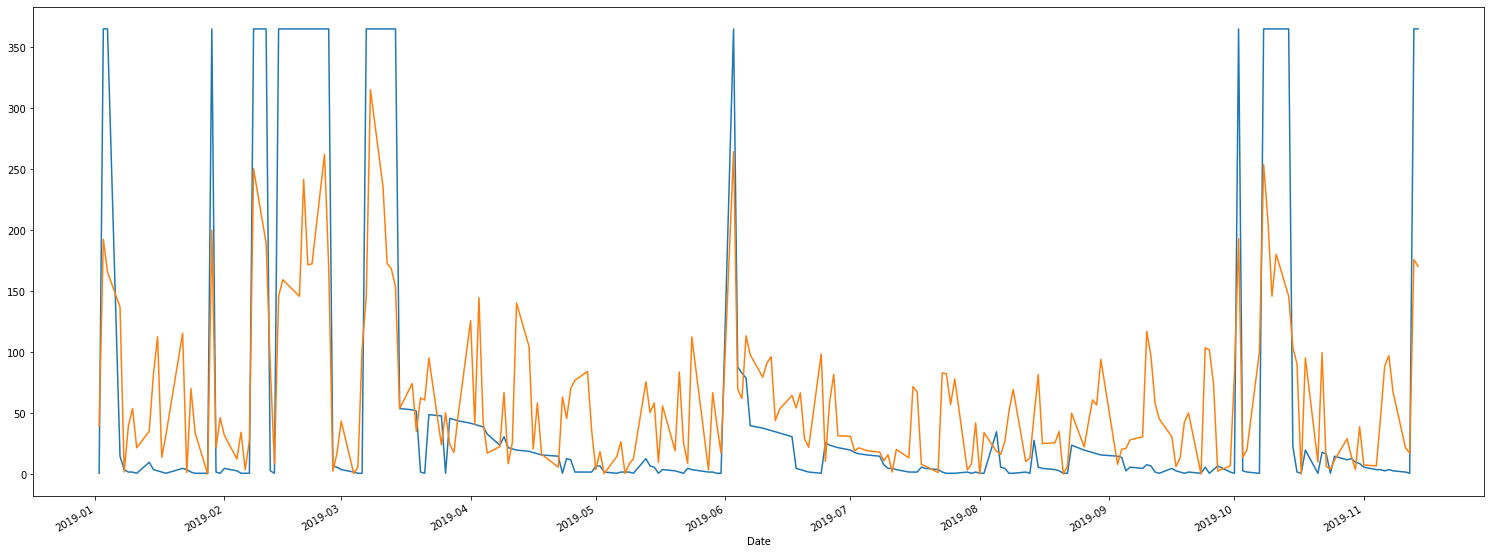

transformer
52.104448908710346
5932.641658208965


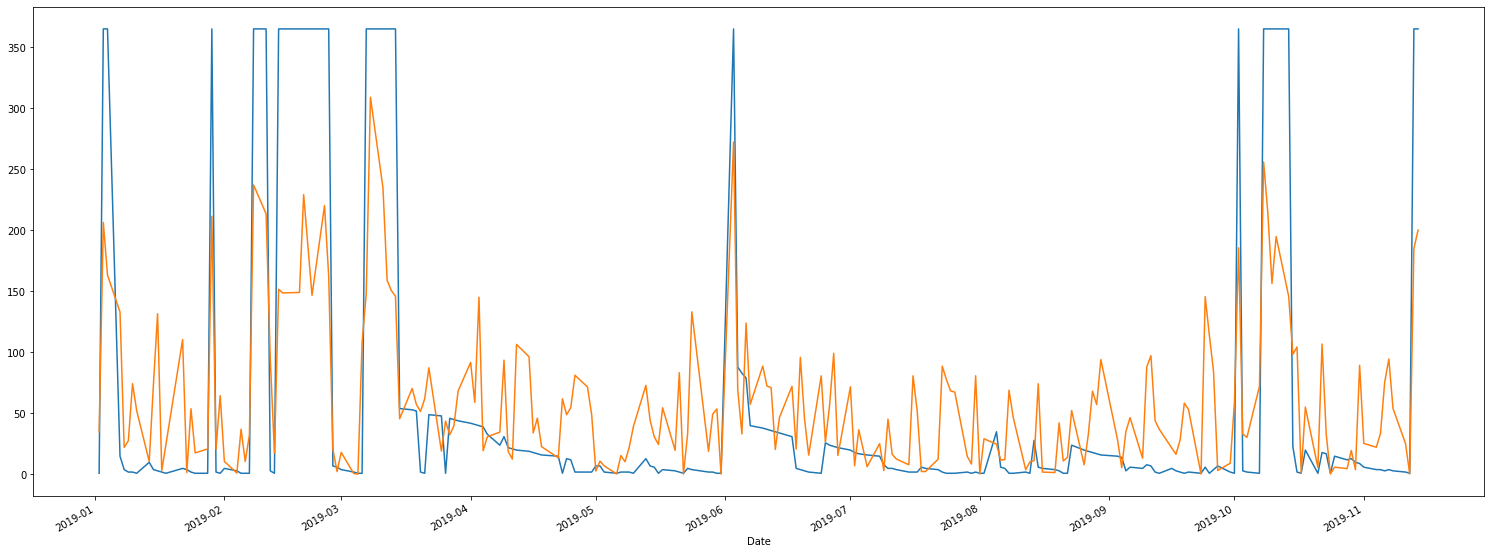

In [17]:
from task3 import get_model_fit_predict
from utils.preprocessing import create_features_and_split

models = get_model_fit_predict
graps = {}
true_target = true_target
input_data = create_features_and_split(
    data.iloc[:-1], 
    true_target,
    split_date='2018-12-31'
)
for model_name, model_fit_predict in models.items():
    model_predict = model_fit_predict(input_data)
    graps[model_name] = model_predict
    
for k,v in graps.items():
    print(k)
    print(mean_absolute_error(true_target, v))
    print(mean_squared_error(true_target, v))
    true_target.plot(figsize=(26, 10))
    v.plot()
    plt.show()

In [18]:
pd.DataFrame(np.array([v for k, v in graps.items()]).T, columns=graps.keys()).corr()

,lin_reg,elastic_net,lgbm,lstm,transformer
lin_reg,1.000000,0.930166,0.898409,0.879238,0.876997
elastic_net,0.930166,1.000000,0.948489,0.942957,0.943624
lgbm,0.898409,0.948489,1.000000,0.955984,0.957072
lstm,0.879238,0.942957,0.955984,1.000000,0.965609
transformer,0.876997,0.943624,0.957072,0.965609,1.000000
